In [4]:
import pandas as pd

titanic_df = pd.read_csv("./titanic/train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 필요한 라이브러리 불러오기

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- 데이터 정보를 확인

In [6]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## 데이터 가공

### 결측치 처리

In [7]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)

In [10]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 범주형 데이터 값 분포 확인
- Sex
- Cabin
- Embarked

p138
- 머신러닝 알고리즘에 불필요한 피처 제거
===> 딥러닝 x 머신러닝 = 패턴 찾기


In [11]:
# df.drop(['Passengerid','Name','Ticket'])

In [12]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [14]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

### Cabin 칼럼 가공
- 선실 등급을 나타내는 첫 번째 알파벳이 중요함


In [15]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 탐색적 데이터 분석

In [16]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count() # 1은 생존 0은 사망

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

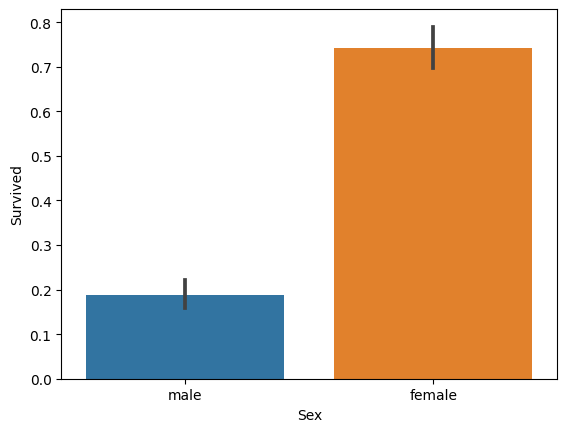

In [17]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

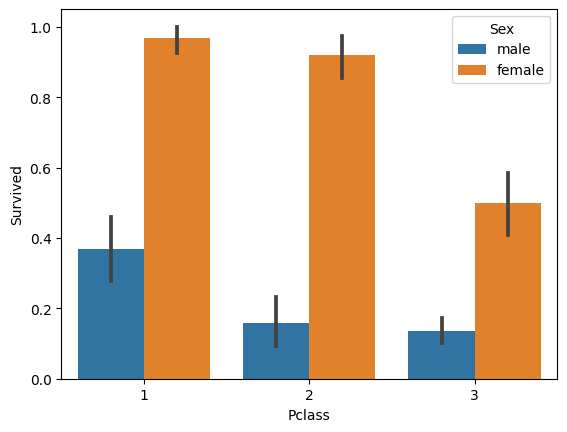

In [18]:
sns.barplot(x = 'Pclass', y = 'Survived',hue = 'Sex', data = titanic_df)

### Age 가공

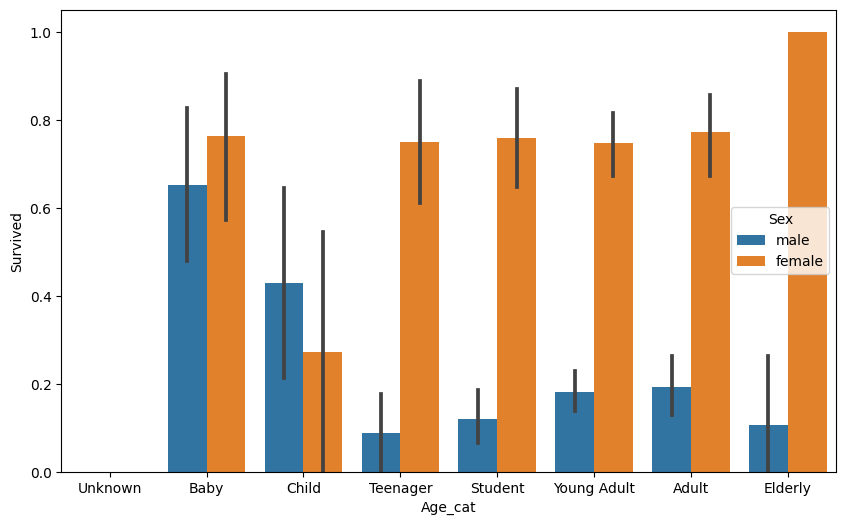

In [19]:
# 입력 age에 따른 구분 값 변환
# apply lambda 식 적용
# 시각화까지하면 인증샷 보내고 쉬기 코드및 시각화 이미지 첨부

def get_category(age):
  cat = ''
  if age <= -1 : cat = "Unknown"
  elif age<= 5 : cat = "Baby"
  elif age<= 12 : cat = "Child"
  elif age<= 18 : cat = "Teenager"
  elif age<= 25 : cat = "Student"
  elif age<= 35 : cat = "Young Adult"
  elif age<= 60 : cat = "Adult"
  else : cat = "Elderly"

  return cat

fig, ax = plt.subplots(figsize=(10,6))
group_names = ["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Elderly"]
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
ax = sns.barplot(x='Age_cat', y='Survived', hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [20]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S


## 데이터 처리
- 인코딩 변환

In [21]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


In [22]:
titanic_df.drop(['PassengerId','Name','Ticket'], axis =1, inplace =True)

In [23]:
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3


- 작은 미션 : 138~139, 테스트

In [24]:
y_titanic_df = titanic_df['Survived'] # 종속변수
X_titanic_df = titanic_df.drop('Survived', axis =1)

X_titanic_df.shape, y_titanic_df.shape

((891, 8), (891,))

In [25]:
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df,
    y_titanic_df,
    test_size = 0.2,
    random_state = 11
)

X_train.shape, X_test.shape, y_train.shape,y_test.shape

((712, 8), (179, 8), (712,), (179,))

## 머신러닝 알고리즘 호출

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


- Regression(선형회귀)
- Logisticregresison
- DecisionTree
- RandomForest
- LightGBM ( 옵션:XGboost) <--- SGD

- 핵심만?!
  + Regression / LightGBM

- 프로젝트 / 수치 예측
  : Regression & LightGBM
- 프로젝트 / 분류 예측
  : LogisticRegressin / LightGBM


결정계수는 회귀모형을 할 때만 사용한다!

DecisionTree / 결정계수 쓰면 안됨
LightGBM  / 결정계수 쓰면 안됨
존재하지 않는 개

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Outcome : 클래스 결정 값 (0 또는 1)
  + 0 : 음성
  + 1 : 양성

In [32]:
# 174p
# Negative 값이 0이 500개, Positive 값이 268개
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [33]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
# 175p
X = diabetes_data.iloc[:,:-1] # Outcome column 제외
y = diabetes_data.iloc[:,-1] # Outcome column

X_train , X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 1 , stratify = y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [36]:
# 로지스틱 회귀로 학습, 예측 및 평가
Ir_clf = LogisticRegression(solver = 'liblinear')
Ir_clf.fit(X_train, y_train)
pred = Ir_clf.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [37]:
pred_proba = Ir_clf.predict_proba(X_test)[:,1]
pred_proba

array([0.12513103, 0.22310535, 0.07368291, 0.63874808, 0.30748401,
       0.22495703, 0.07192899, 0.19841111, 0.71805668, 0.10567534,
       0.21869484, 0.11357987, 0.6264738 , 0.06013526, 0.10648627,
       0.36867849, 0.29136292, 0.51021514, 0.22103359, 0.58215935,
       0.60048992, 0.10921887, 0.44361111, 0.05397107, 0.29204559,
       0.16768549, 0.63666929, 0.14415684, 0.10210892, 0.12220125,
       0.12466878, 0.01051521, 0.0661308 , 0.2746714 , 0.64724875,
       0.73675527, 0.21210558, 0.77503493, 0.20850054, 0.1878509 ,
       0.13909782, 0.89180878, 0.170502  , 0.39396819, 0.31348301,
       0.28245512, 0.31086683, 0.16401084, 0.47330544, 0.90061673,
       0.08037453, 0.23547577, 0.59773306, 0.37793419, 0.26020231,
       0.3306022 , 0.19607642, 0.06778875, 0.47579692, 0.7930476 ,
       0.09917496, 0.24338169, 0.0700139 , 0.15533441, 0.9557827 ,
       0.13595557, 0.00886928, 0.78499356, 0.07575655, 0.38747727,
       0.73185777, 0.21103261, 0.30620311, 0.36506239, 0.35307

In [38]:
# 수정된 get_clf_eval() 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
tn, fp, fn, tp

(90, 10, 26, 28)

In [43]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [26 28]]
정확도: 0.7662, 정밀도: 0.7368, 재현율: 0.5185,    F1: 0.6087, AUC:0.8020


In [39]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

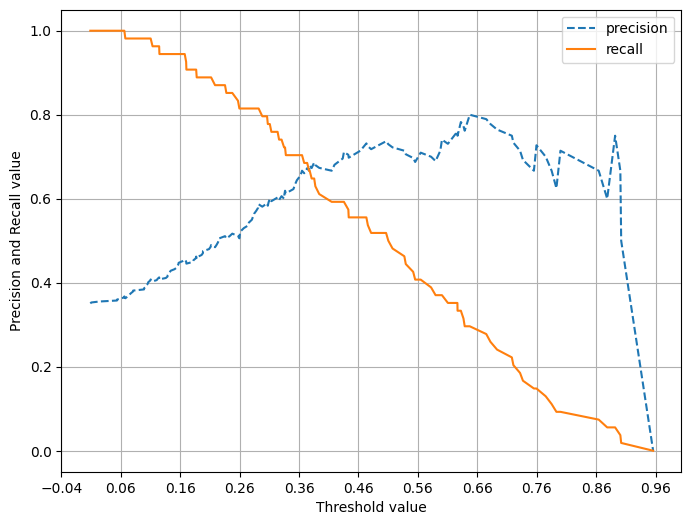

In [41]:
pred_proba_c1 = Ir_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [ ]:
plt.hist

In [45]:
# p.177
# 피처 0 값의 건수 및
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [47]:
mean_zero_features = diabetes_data[zero_features].mean()
mean_zero_features

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [49]:
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [50]:
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [51]:
X = diabetes_data.iloc[:,:-1] # Outcome column 제외
y = diabetes_data.iloc[:,-1] # Outcome column

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)
Ir_clf = LogisticRegression(solver = 'liblinear')
Ir_clf.fit(X_train, y_train)
pred = Ir_clf.predict(X_test)
pred_proba = Ir_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


평가지표 -> 현재는 재현율이 제일 중요하다.

In [52]:
# 179p
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [55]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임곗값: 0.3
오차 행렬
[[ 1 99]
 [ 4 50]]
정확도: 0.3312, 정밀도: 0.3356, 재현율: 0.9259,    F1: 0.4926, AUC:0.1670
임곗값: 0.33
오차 행렬
[[ 1 99]
 [ 6 48]]
정확도: 0.3182, 정밀도: 0.3265, 재현율: 0.8889,    F1: 0.4776, AUC:0.1670
임곗값: 0.36
오차 행렬
[[ 1 99]
 [ 7 47]]
정확도: 0.3117, 정밀도: 0.3219, 재현율: 0.8704,    F1: 0.4700, AUC:0.1670
임곗값: 0.39
오차 행렬
[[ 1 99]
 [ 9 45]]
정확도: 0.2987, 정밀도: 0.3125, 재현율: 0.8333,    F1: 0.4545, AUC:0.1670
임곗값: 0.42
오차 행렬
[[ 1 99]
 [10 44]]
정확도: 0.2922, 정밀도: 0.3077, 재현율: 0.8148,    F1: 0.4467, AUC:0.1670
임곗값: 0.45
오차 행렬
[[ 1 99]
 [12 42]]
정확도: 0.2792, 정밀도: 0.2979, 재현율: 0.7778,    F1: 0.4308, AUC:0.1670
임곗값: 0.48
오차 행렬
[[ 2 98]
 [12 42]]
정확도: 0.2857, 정밀도: 0.3000, 재현율: 0.7778,    F1: 0.4330, AUC:0.1670
임곗값: 0.5
오차 행렬
[[ 2 98]
 [15 39]]
정확도: 0.2662, 정밀도: 0.2847, 재현율: 0.7222,    F1: 0.4084, AUC:0.1670


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [56]:
# 180p
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test, pred_th_048, pred_proba[:,-1])

오차 행렬
[[ 2 98]
 [12 42]]
정확도: 0.2857, 정밀도: 0.3000, 재현율: 0.7778,    F1: 0.4330, AUC:0.1670
